# About the data
Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

# Problem Statement:
Predict the Penguin

<b> Data Dictionary </b> 

|Variable|Definition|
|--------|----------|
|species|<ul><li>Chinstrap</li><li>Adélie</li><li>Gentoo</li></ul>|
|culmen_length_mm|culmen length (mm)|
|culmen_depth_mm|culmen depth (mm)|
|flipper_length_mm|flipper length (mm)|
|body_mass_g|body mass (g)|
|island|Island in the Palmer Archipelago (Antarctica)<ul><li>Dream</li><li>Torgersen</li><li>Biscoe</li></ul>|
|sex|gender of penguin|

<b> Meet the Palmer penguins </b>

<center><img src="https://allisonhorst.github.io/palmerpenguins/reference/figures/lter_penguins.png" alt="Drawing" width="400"></center>

#### Importing libraries

In [1]:
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split, KFold, cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score

import warnings

%matplotlib inline
warnings.filterwarnings('ignore')

C:\Users\lenovo\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\lenovo\anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\lenovo\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


#### Loading data

In [2]:
data = pd.read_csv("penguins_size.csv")

In [3]:
data.head(3)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE


In [4]:
print("Shape of Dataset is {} rows and {} columns".format(*data.shape))

Shape of Dataset is 344 rows and 7 columns


In [5]:
# Missing values
def missing_values_table(df):
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_cols = mis_val_table.rename(columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        mis_val_table_cols = mis_val_table_cols[mis_val_table_cols.iloc[:,1] != 0].sort_values('% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]))   
        print("There are " + str(mis_val_table_cols.shape[0])+" columns that have missing values.")
        return mis_val_table_cols

In [6]:
missing_values_table(data).style.background_gradient(cmap='plasma')

Your selected dataframe has 7
There are 5 columns that have missing values.


,Missing Values,% of Total Values
sex,10,2.900000
culmen_length_mm,2,0.600000
culmen_depth_mm,2,0.600000
flipper_length_mm,2,0.600000
body_mass_g,2,0.600000


#### Checking for basic details 

In [7]:
data.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


#### Checking for duplicated values

In [9]:
data.duplicated().any()

False

<b> Visualizing the missing data </b>

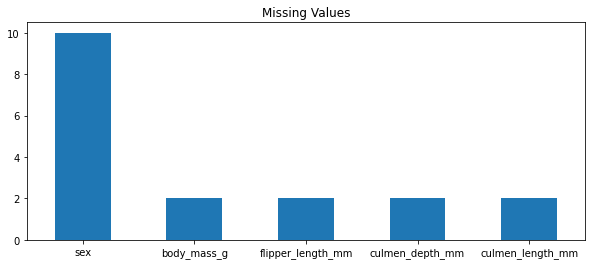

In [10]:
def cal_missing(data):
    missing = data.isna().sum().sort_values(ascending=False)
    missing = missing[missing!=0]
    missing_perc = missing / data.shape[0]*100
    return missing, missing_perc

if data.isna().any().sum()>0:
    missing, missing_perc = cal_missing(data)
    missing.plot(kind='bar', figsize=(10,4))
    plt.title("Missing Values")
    plt.xticks(rotation = 360)
    plt.show()
else:
    print("No Missing Values")

### Exploratory Data Analysis 

In [11]:
data.head(2)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE


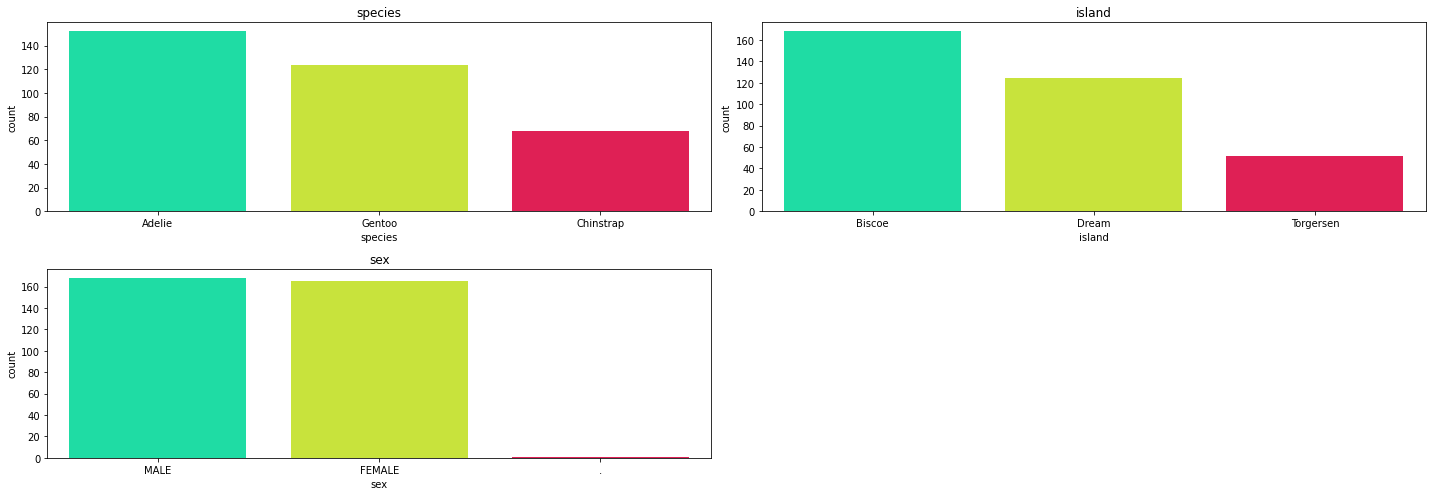

In [12]:
l = ['species','island','sex']
j = 1
plt.figure(figsize=(20,7))
for i in l:
    plt.subplot(2,2,j)
    sns.countplot(data[i],palette = "gist_ncar", order = data[i].value_counts().index)
    plt.title(i)
    j = j+1
plt.tight_layout()

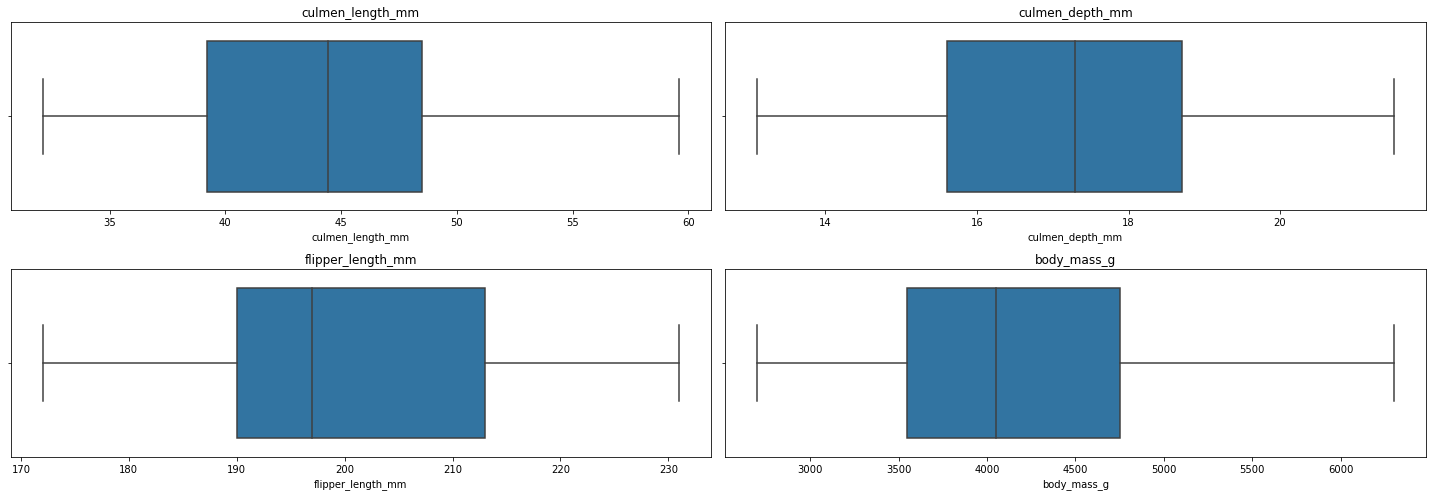

In [13]:
l = ['culmen_length_mm', 'culmen_depth_mm','flipper_length_mm', 'body_mass_g']
j = 1
plt.figure(figsize=(20,7))
for i in l:
    plt.subplot(2,2,j)
    sns.boxplot(data[i])
    plt.title(i)
    j = j+1
plt.tight_layout()

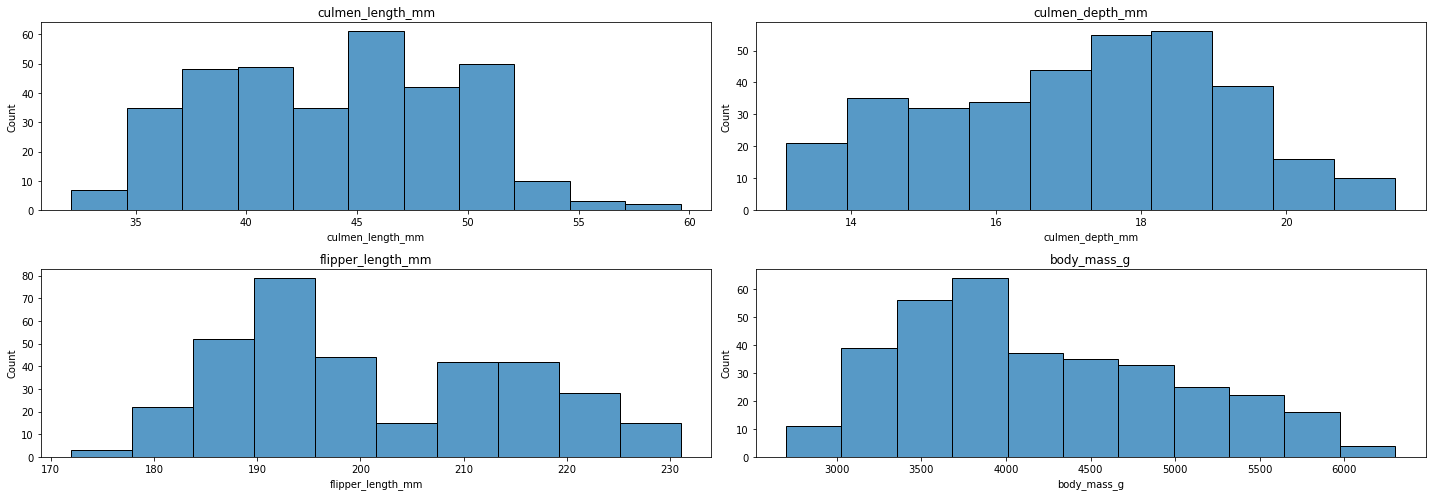

In [14]:
l = ['culmen_length_mm', 'culmen_depth_mm','flipper_length_mm', 'body_mass_g']
j = 1
plt.figure(figsize=(20,7))
for i in l:
    plt.subplot(2,2,j)
    sns.histplot(data[i])
    plt.title(i)
    j = j+1
plt.tight_layout()

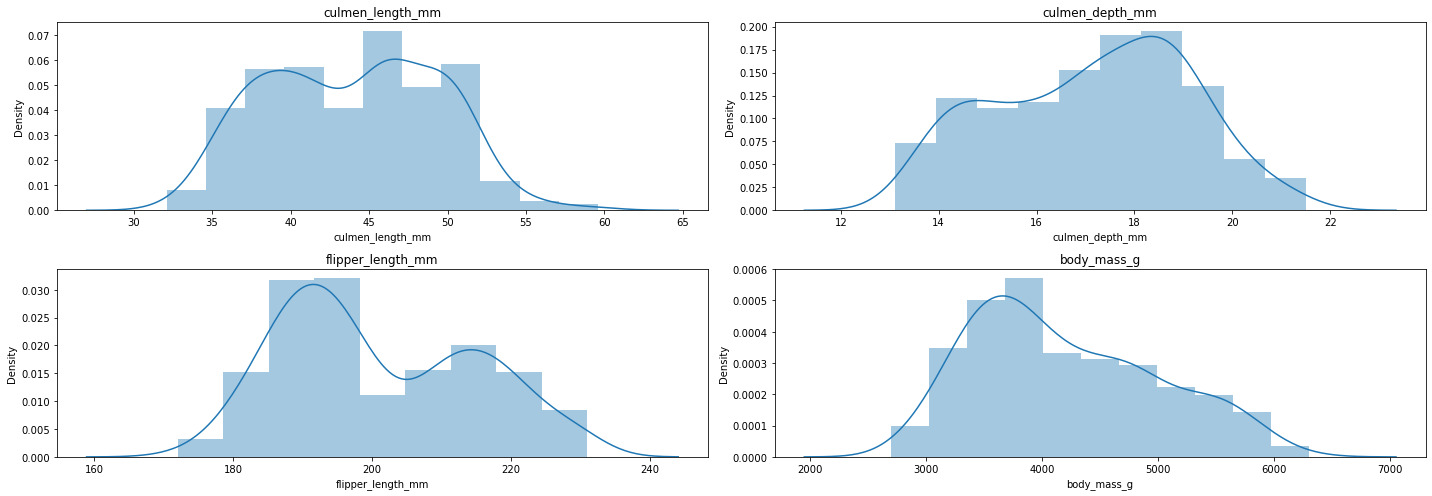

In [15]:
l = ['culmen_length_mm', 'culmen_depth_mm','flipper_length_mm', 'body_mass_g']
j = 1
plt.figure(figsize=(20,7))
for i in l:
    plt.subplot(2,2,j)
    sns.distplot(data[i])
    plt.title(i)
    j = j+1
plt.tight_layout()

<Figure size 720x504 with 0 Axes>

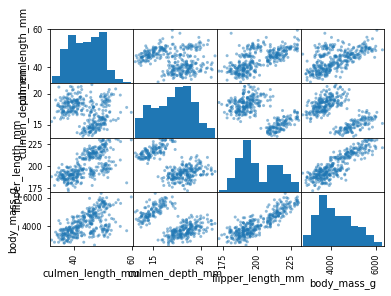

In [16]:
plt.figure(figsize=(10,7))
l = ['culmen_length_mm', 'culmen_depth_mm','flipper_length_mm', 'body_mass_g']
scatter_matrix(data[l])
plt.show()

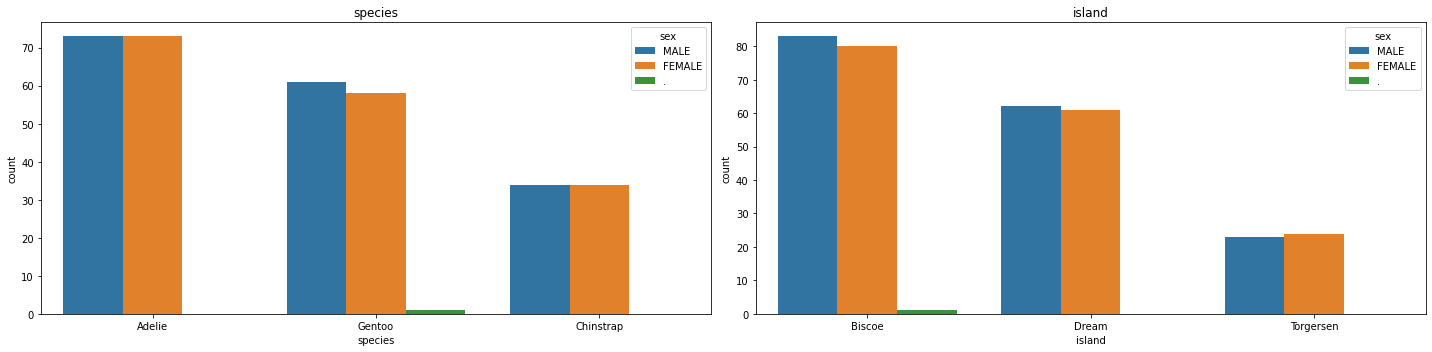

In [17]:
l = ['species','island']
j = 1
plt.figure(figsize=(20,5))
for i in l:
    plt.subplot(1,2,j)
    sns.countplot(data[i],hue = data['sex'], order = data[i].value_counts().index)
    plt.title(i)
    j = j+1
plt.tight_layout()

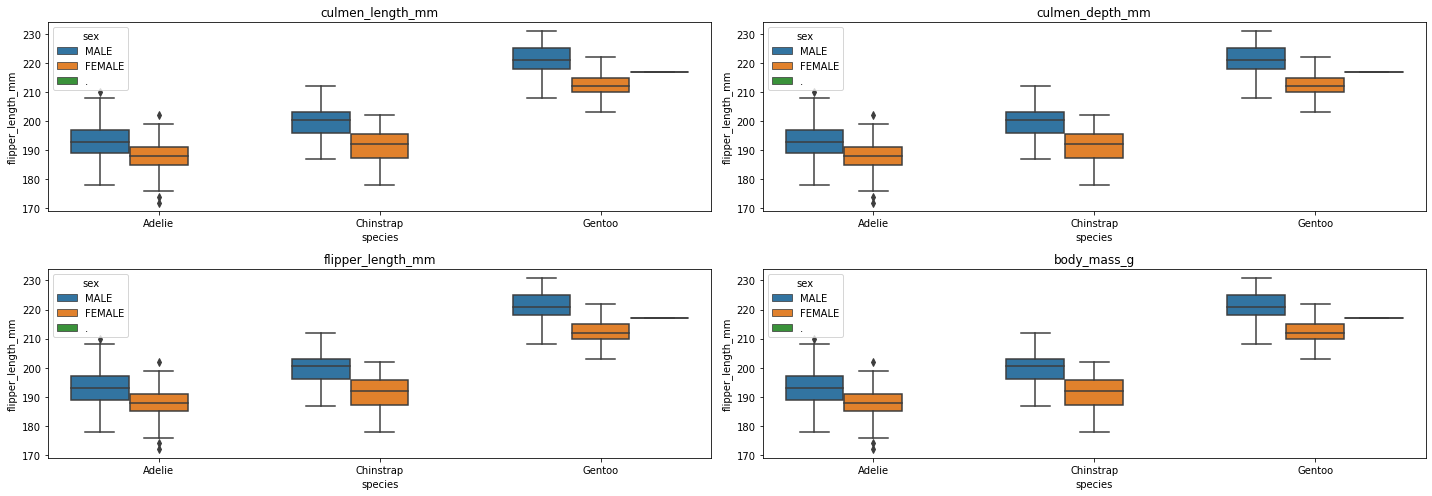

In [20]:
l = ['culmen_length_mm', 'culmen_depth_mm','flipper_length_mm', 'body_mass_g']
j = 1
plt.figure(figsize=(20,7))
for i in l:
    plt.subplot(2,2,j)
    sns.boxplot(x=data.species,y=data.flipper_length_mm,hue = data.sex,)
    plt.title(i)
    j = j+1
plt.tight_layout()

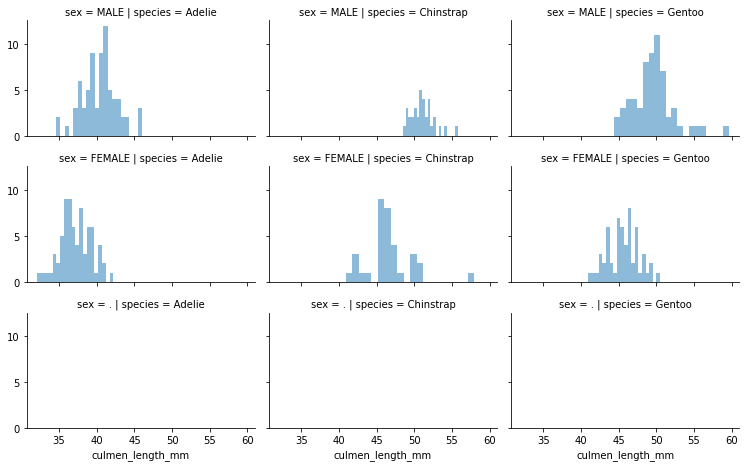

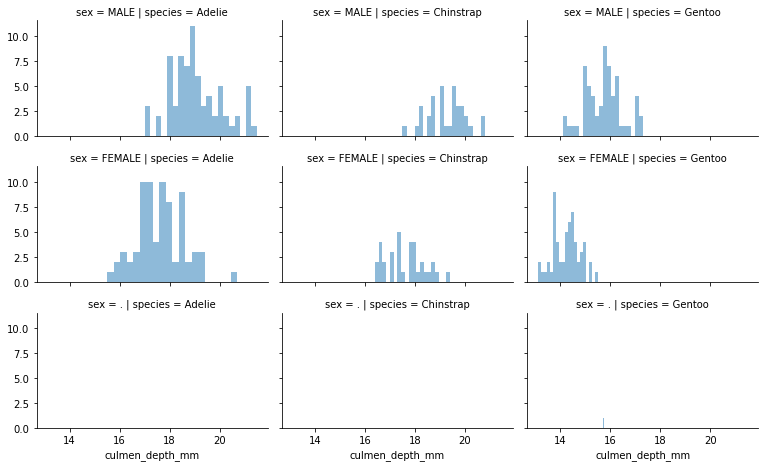

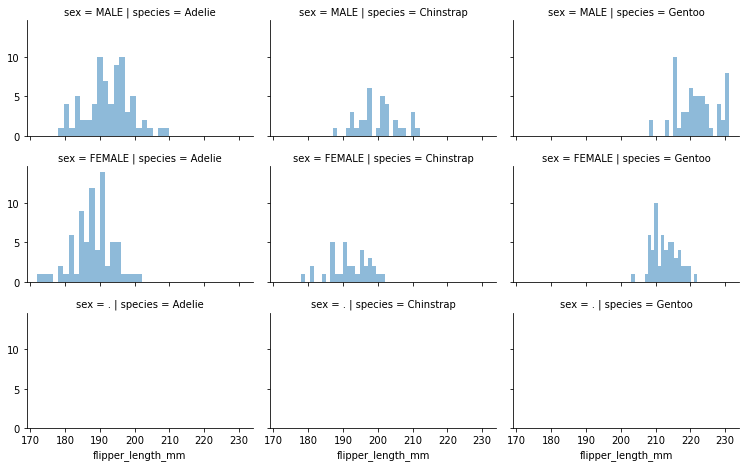

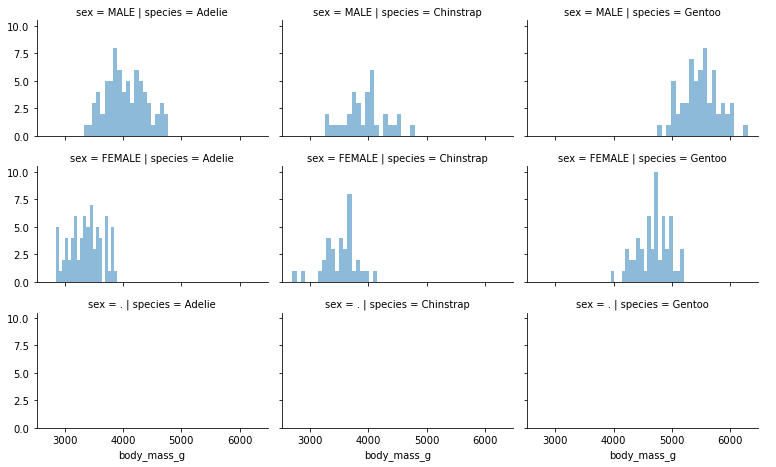

In [21]:
col_list = ['culmen_length_mm', 'culmen_depth_mm','flipper_length_mm', 'body_mass_g']
col = 'species'
row = 'sex'
for i in col_list:
    grid = sns.FacetGrid(data, col=col, row=row, size=2.2, aspect=1.6)
    grid.map(plt.hist, i, alpha=.5, bins=20)
    grid.add_legend();

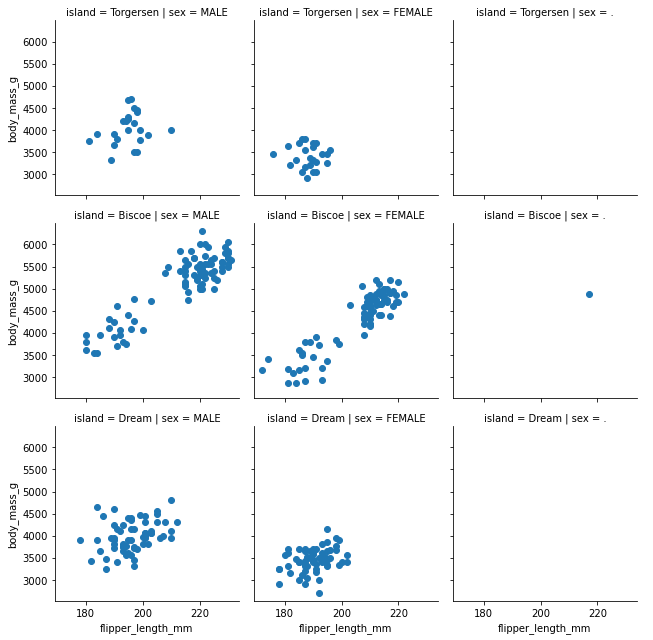

In [22]:
sns.FacetGrid(data = data,row = "island", col = "sex").map(plt.scatter ,"flipper_length_mm","body_mass_g").add_legend()

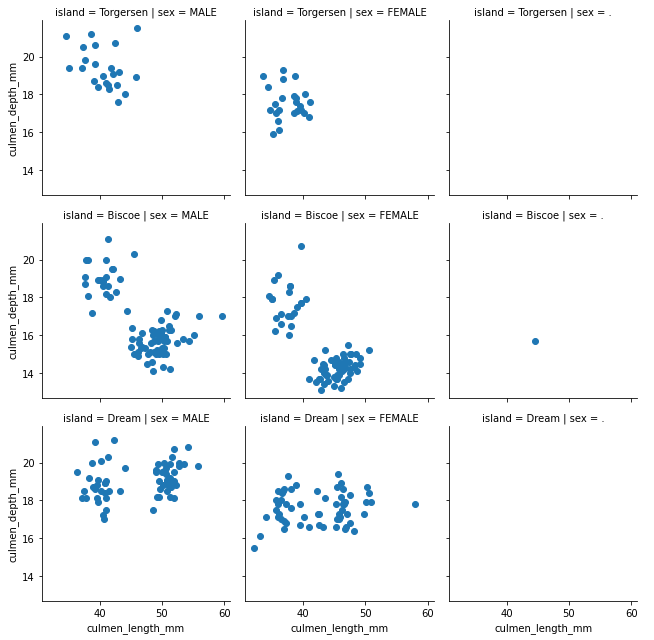

In [23]:
sns.FacetGrid(data = data,row = "island", col = "sex").map(plt.scatter ,'culmen_length_mm', 'culmen_depth_mm' ).add_legend()

### Missing Value Imputation

In [24]:
data['sex'].fillna(data['sex'].mode()[0],inplace=True)
data["sex"].replace({".": "FEMALE"}, inplace=True)

In [25]:
data['culmen_length_mm'].groupby(data['sex']).mean()

sex
FEMALE    42.111446
MALE      45.629545
Name: culmen_length_mm, dtype: float64

In [26]:
col_to_imput = ['culmen_length_mm', 'culmen_depth_mm','flipper_length_mm', 'body_mass_g']
for item in col_to_imput:
    data[item].fillna(data[item].median(),inplace=True)

In [27]:
missing_values_table(data).style.background_gradient(cmap='Reds')

Your selected dataframe has 7
There are 0 columns that have missing values.


,Missing Values,% of Total Values


<AxesSubplot:>

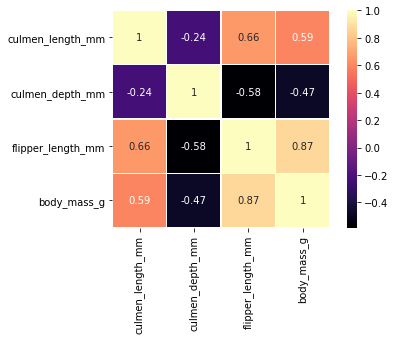

In [28]:
sns.heatmap(data.corr(), annot = True, cmap="magma", square = True, linecolor='white', linewidths=0.3)

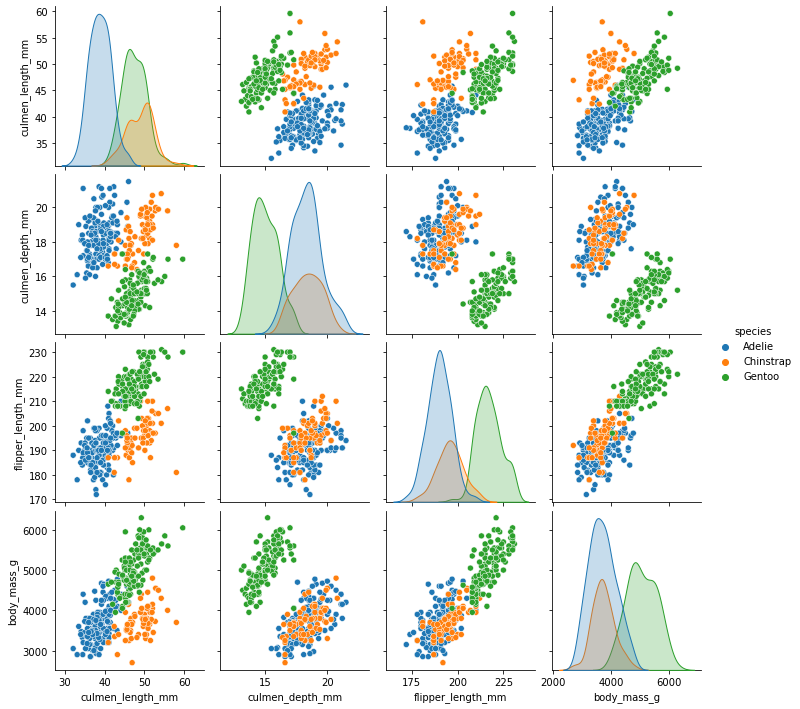

In [29]:
sns.pairplot(data,hue='species')

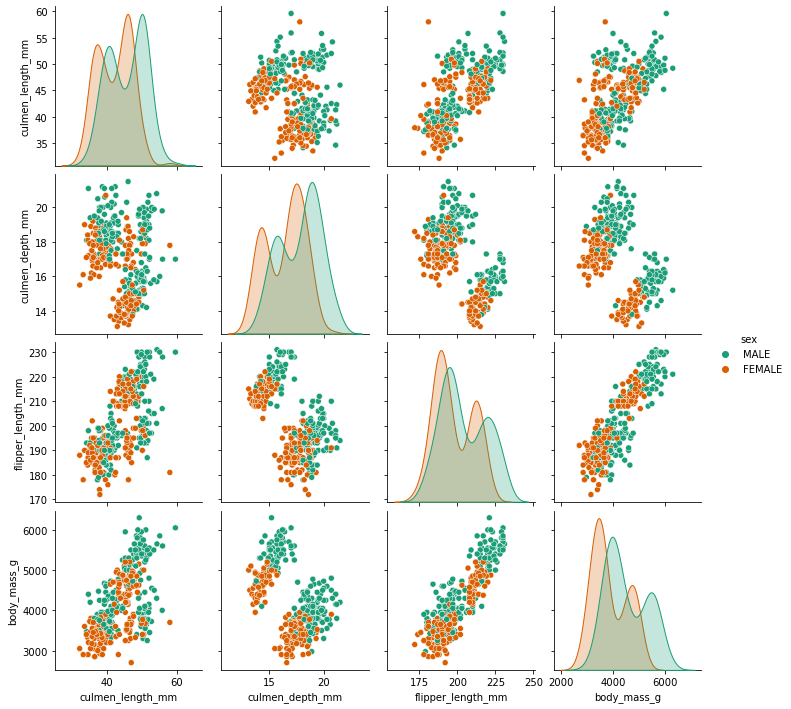

In [30]:
sns.pairplot(data,hue='sex', palette="Dark2" )

#### Label Encoding the Data

In [32]:
le = LabelEncoder() 
  
data['sex']= le.fit_transform(data['sex']) 
data['island']= le.fit_transform(data['island'])
data['species']= le.fit_transform(data['species'])

In [33]:
data.head(2)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,2,39.1,18.7,181.0,3750.0,1
1,0,2,39.5,17.4,186.0,3800.0,0


### Model Building
- <b> LogisticRegression </b>

In [77]:
def logreg(X,y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=42)
    lr = LogisticRegression()
    lr.fit(X_train,y_train)
    y_pred = lr.predict(X_val)
    print('Accuracy Score using LogisticRegression : ', accuracy_score(y_val, y_pred))
    print('F1 Score using LogisticRegression : ', f1_score(y_val, y_pred, average = 'weighted'))
    print('Precision using LogisticRegression : ', precision_score(y_val, y_pred, average = 'weighted'))
    print('Recall using LogisticRegression : ', recall_score(y_val, y_pred, average = 'weighted'))
    print("Confusion Matrix")
    sns.heatmap(confusion_matrix(y_val,y_pred),fmt='.2f', annot=True, linewidths=0.3,linecolor='white')

- <b> DecisionTreeClassifier </b>

In [83]:
def DesTre(X,y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=42)
    dtc = DecisionTreeClassifier(criterion='entropy')
    dtc.fit(X_train,y_train)
    y_pred = dtc.predict(X_val)
    print('Accuracy using DecisionTreeClassifier: ', accuracy_score(y_val, y_pred))
    print('F1 Score using DecisionTreeClassifier: ', f1_score(y_val, y_pred, average = 'weighted'))
    print('Precision using DecisionTreeClassifier: ', precision_score(y_val, y_pred, average = 'weighted'))
    print('Recall using DecisionTreeClassifier: ', recall_score(y_val, y_pred, average = 'weighted'))
    print("Confusion Matrix")
    sns.heatmap(confusion_matrix(y_val,y_pred),fmt='.2f', annot=True, linewidths=0.3,linecolor='white')

- <b> RandomForestClassifier </b>

In [76]:
def rfc(X,y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=42)
    rfc = RandomForestClassifier()
    rfc.fit(X_train,y_train)
    y_pred = rfc.predict(X_val)
    print('Accuracy using RandomForestClassifier: ', accuracy_score(y_val, y_pred))
    print('F1 Score using RandomForestClassifier: ', f1_score(y_val, y_pred, average = 'weighted'))
    print('Precision using RandomForestClassifier: ', precision_score(y_val, y_pred, average = 'weighted'))
    print('Recall using RandomForestClassifier: ', recall_score(y_val, y_pred, average = 'weighted'))
    print("Confusion Matrix")
    sns.heatmap(confusion_matrix(y_val,y_pred),fmt='.2f', annot=True, linewidths=0.3,linecolor='white')

- <b> KNeighborsClassifier </b>

In [75]:
def knn(X,y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=42)
    knn = KNeighborsClassifier(n_neighbors=10,weights='distance',n_jobs=100)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_val)
    print('Accuracy using KNeighborsClassifier: ', round(accuracy_score(y_val, y_pred)*100,2))
    print('F1 Score using KNeighborsClassifier: ', round(f1_score(y_val, y_pred, average = 'weighted')))
    print('Precision using KNeighborsClassifier: ', precision_score(y_val, y_pred, average = 'weighted'))
    print('Recall using KNeighborsClassifier: ', recall_score(y_val, y_pred, average = 'weighted'))
    print("Confusion Matrix")
    sns.heatmap(confusion_matrix(y_val,y_pred),fmt='.2f', annot=True, linewidths=0.3,linecolor='white')

#### Data Split

In [46]:
X = data.drop('species', axis = 1)
y = data['species']

Accuracy Score using LogisticRegression :  1.0
F1 Score using LogisticRegression :  1.0
Precision using LogisticRegression :  1.0
Recall using LogisticRegression :  1.0
Confusion Matrix


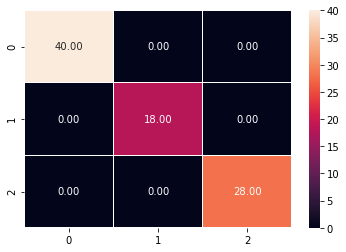

In [78]:
logreg(X,y)

Accuracy using DecisionTreeClassifier:  0.9651162790697675
F1 Score using DecisionTreeClassifier:  0.9654301227128645
Precision using DecisionTreeClassifier:  0.9674418604651163
Recall using DecisionTreeClassifier:  0.9651162790697675
Confusion Matrix


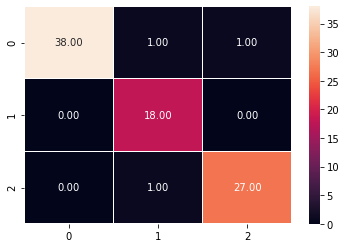

In [84]:
DesTre(X,y)

Accuracy using RandomForestClassifier:  0.9883720930232558
F1 Score using RandomForestClassifier:  0.9884556325533659
Precision using RandomForestClassifier:  0.988984088127295
Recall using RandomForestClassifier:  0.9883720930232558
Confusion Matrix


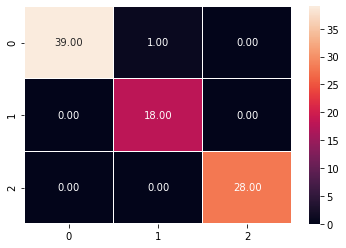

In [80]:
rfc(X,y)

Accuracy using KNeighborsClassifier:  70.93
F1 Score using KNeighborsClassifier:  1
Precision using KNeighborsClassifier:  0.6962014893967393
Recall using KNeighborsClassifier:  0.7093023255813954
Confusion Matrix


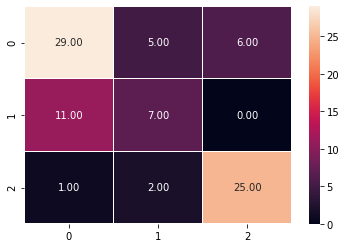

In [81]:
knn(X,y)

#### KFold
<b> 1. LogisticRegression </b>

In [54]:
i = 1
kf = KFold(n_splits=5, random_state=None, shuffle=False)
for train_index, test_index in kf.split(X):
    print("\n{} for KFold {}".format(i, kf.n_splits))
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    model = LogisticRegression()
    model.fit(X_train, y_train)
    prod_test = model.predict(X_test)
    score = accuracy_score(y_test, prod_test)
    print("Accuracy score", score)
    i=i+1


1 for KFold 5
Accuracy score 0.927536231884058

2 for KFold 5
Accuracy score 1.0

3 for KFold 5
Accuracy score 0.8985507246376812

4 for KFold 5
Accuracy score 0.9855072463768116

5 for KFold 5
Accuracy score 0.9852941176470589


<b> 2. DecisionTreeClassifier </b>

In [55]:
i = 1
kf = KFold(n_splits=5, random_state=None, shuffle=False)
for train_index, test_index in kf.split(X):
    print("\n{} for KFold {}".format(i, kf.n_splits))
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    model = DecisionTreeClassifier()
    model.fit(X_train, y_train)
    prod_test = model.predict(X_test)
    score = accuracy_score(y_test, prod_test)
    print("Accuracy score", score)
    i=i+1


1 for KFold 5
Accuracy score 0.9855072463768116

2 for KFold 5
Accuracy score 0.9130434782608695

3 for KFold 5
Accuracy score 0.9130434782608695

4 for KFold 5
Accuracy score 0.927536231884058

5 for KFold 5
Accuracy score 0.9705882352941176


<b> 3. RandomForestClassifier </b>

In [56]:
i = 1
kf = KFold(n_splits=5, random_state=None, shuffle=False)
for train_index, test_index in kf.split(X):
    print("\n{} for KFold {}".format(i, kf.n_splits))
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    model = RandomForestClassifier()
    model.fit(X_train, y_train)
    prod_test = model.predict(X_test)
    score = accuracy_score(y_test, prod_test)
    print("Accuracy score", score)
    i=i+1


1 for KFold 5
Accuracy score 0.9855072463768116

2 for KFold 5
Accuracy score 0.9855072463768116

3 for KFold 5
Accuracy score 0.9130434782608695

4 for KFold 5
Accuracy score 1.0

5 for KFold 5
Accuracy score 0.9852941176470589


<b> 4. KNeighborsClassifier </b>

In [57]:
i = 1
kf = KFold(n_splits=5, random_state=None, shuffle=False)
for train_index, test_index in kf.split(X):
    print("\n{} for KFold {}".format(i, kf.n_splits))
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    model = KNeighborsClassifier()
    model.fit(X_train, y_train)
    prod_test = model.predict(X_test)
    score = accuracy_score(y_test, prod_test)
    print("Accuracy score", score)
    i=i+1


1 for KFold 5
Accuracy score 0.6376811594202898

2 for KFold 5
Accuracy score 0.7681159420289855

3 for KFold 5
Accuracy score 0.21739130434782608

4 for KFold 5
Accuracy score 0.782608695652174

5 for KFold 5
Accuracy score 0.8529411764705882


# The End